# Chapter 22 exercise solutions

3. Write a function my_lorenz_solver(t_span,s0,sigma,rho,beta)solves the Lorenz equations us-
ing solve_ivp, the function returns [T,X,Y,Z]. The input argument t_span should be a list of the 
form [t0, tf ], where t0 is the initial time, and tf is the ﬁnal time of consideration. The input ar-
gument s0 should be a 3D array of the form [x0, y0, z0], where (x0, y0, z0) represents an initial 
position. Finally, the input arguments sigma, rho, and β are the scalar parameters σ, ρ, and β of 
the Lorenz system. The output argument T should be an array of times given as the output argu-
ment of solve_ivp. The output arguments, X, Y, and Z should be the numerically integrated solution 
produced from my_lorenz in the previous problem and solve_ivp.

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib .pyplot as plt
from mpl_toolkits import mplot3d
from functools import partial

In [3]:
def my_lorenz_solver(t_span, s0, sigma, rho, beta):
    def lorenz(t, s):
        x, y, z = s
        dxdt = sigma * (y - x)
        dydt = x * (rho - z) - y
        dzdt = x * y - beta * z
        return [dxdt, dydt, dzdt]
    
    sol = solve_ivp(lorenz, t_span, s0, t_eval=np.linspace(t_span[0], t_span[1], 1000))
    
    T = sol.t
    X, Y, Z = sol.y
    
    return [T, X, Y, Z]

In [5]:
sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

[T, X, Y, Z] = my_lorenz_solver([t0, tf], s0, sigma, rho, beta)

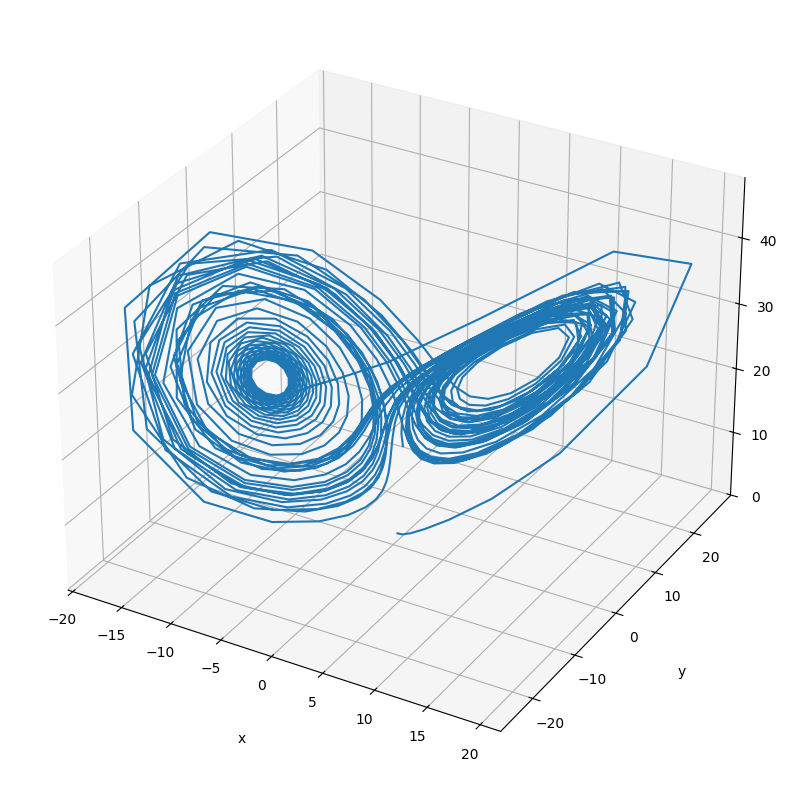

In [11]:
fig = plt.figure(figsize = (10,10)) 
ax = plt.axes(projection="3d") 
ax.grid()

ax.plot3D(X, Y, Z)

# Set axes label 
ax.set_xlabel("x", labelpad=20) 
ax.set_ylabel("y", labelpad=20) 
ax.set_zlabel("z", labelpad=20)

plt.show()

**4.** Consider the following model of a *mass–spring–damper* (MSD) system in one dimension. In this figure, *m* denotes the mass of the block, *c* is called the damping coefficient, and *k* is the spring stiffness. A damper is a mechanism that dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications, such as shock observers and structural systems.  
The relationship between acceleration, velocity, and displacement can be expressed by the following MSD differential equation:

$$
m\ddot{x} + c\dot{x} + kx = 0,
$$

which can be rewritten as

$$
\ddot{x} = \frac{-(c\dot{x} + kx)}{m}.
$$

Let the state of the system be denoted by the vector S = [x; v] where x is the displacement of the 
mass from its resting conﬁguration, and v is its velocity. Rewrite the MSD equation as a ﬁrst-order 
differential equation in terms of the state, S. In other words, rewrite the MSD equation as dS/dt = 
f (t, S).
Write a function my_msd(t,S,m,c,k) where t is a scalar denoting time, S is a 2D vector denoting 
the state of the MSD system, and m, c, and kare the mass, damping, and stiffness coefﬁcients of the 
MSD equation, respectively.

In [14]:
def my_msd(t, S, m, c, k):
    x, v = S  
    dxdt = v
    dvdt = (-c * v - k * x) / m
    ds = np.array([dxdt, dvdt])  
    return ds

In [15]:
my_msd(0, [1, -1], 10, 1, 100)

array([-1. , -9.9])

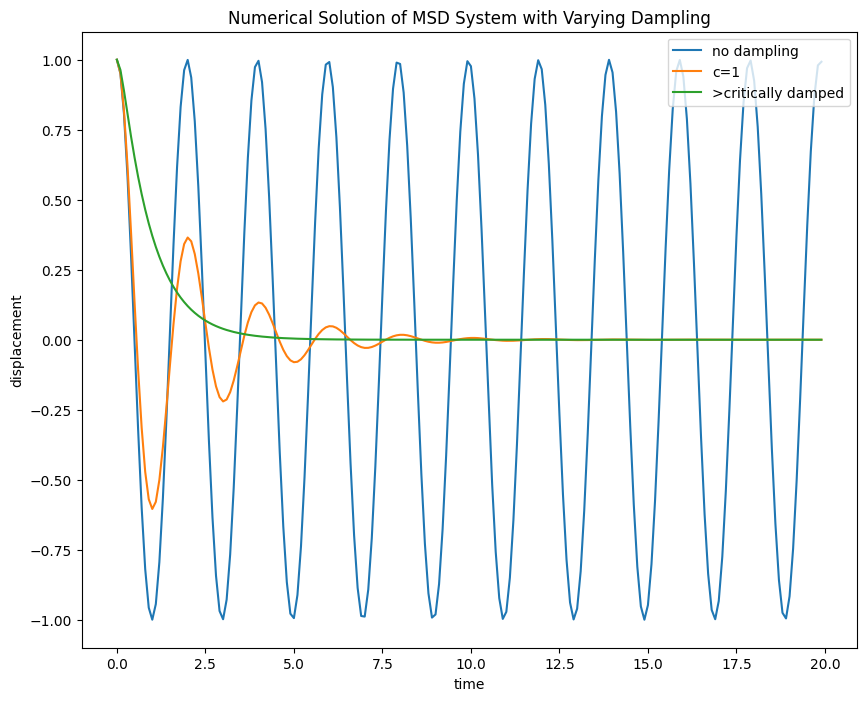

In [18]:
m = 1
k = 10
f = partial(my_msd, m=m, c=0, k=k)
t_e = np.arange(0, 20, 0.1) 
sol_1=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=1, k=k) 
sol_2=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

f = partial(my_msd, m=m, c=10, k=k) 
sol_3=solve_ivp(f,[0,20],[1,0],t_eval=t_e)

plt.figure(figsize = (10, 8)) 
plt.plot(sol_1.t, sol_1.y[0]) 
plt.plot(sol_2.t, sol_2.y[0]) 
plt.plot(sol_3.t, sol_3.y[0]) 
plt.title("Numerical Solution of MSD System with Varying Dampling")
plt.xlabel("time")
plt.ylabel("displacement")
plt.legend(["no dampling", "c=1", ">critically damped"], loc=1)